# Graphs : a primer

In [1]:
#Here are the general imports

In [3]:
import networkx as nx
import pandas as pd
from pandas import *
import matplotlib
from matplotlib import pyplot as plt
import os

In [4]:
G = nx.Graph()

In [5]:
# Let's add one node called : 1

In [6]:
G.add_node(1)

In [7]:
# Let's add 3 nodes from an anonymous list

In [8]:
G.add_nodes_from([2,3,4])

In [9]:
G

In [10]:
#G has 4 nodes now 

In [11]:
G.number_of_nodes()

4

In [12]:
# let's erase the contents of G

In [13]:
G.clear()

## The adjacency matrix approach

In [14]:
# Let's create an adjacency Matrix

In [15]:
M=[[0,1,0,0],[1,0,1,1],[0,1,0,0],[0,1,0,0]]

In [16]:
# let's turn our Matrix ( or list of lists into a Dataframe for prettiness purposes)

In [17]:
def pretty_print(M):
    df=pd.DataFrame(M)
    M_rows=range(1,len(M[0])+1)
    M_columns=range(1,len(M)+1)
    df.columns=M_columns
    df.index=M_rows
    return df

In [18]:
pretty_print(M)

,1,2,3,4
1,0,1,0,0
2,1,0,1,1
3,0,1,0,0
4,0,1,0,0


In [19]:
# another way to display  the sparseness of the matrix

In [20]:
# helper function to hide ticks
def set_off_labels(flag):
    if flag== 'x':
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')

    elif flag == 'y':
        plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off',         # ticks along the top edge are off
        labelleft='off')

In [21]:
def display_adjacency(M):
    plt.imshow(M, plt.get_cmap('spring_r'))
    set_off_labels('x')
    set_off_labels('y')    
    plt.show()

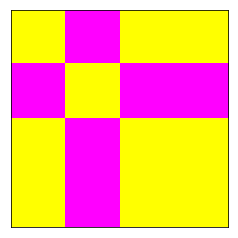

In [22]:
display_adjacency(M)

In [23]:
# get the number of nodes from the adjacency matrix

In [24]:
def get_nodes(M):
    n_nodes=len(M)
    return n_nodes

In [25]:
# create a new empty a directed graph

In [26]:
def create_a_new_md_graph():
    try:
        H.clear()
    except:
        pass
    H=nx.MultiDiGraph()
    return H

In [27]:
H=create_a_new_md_graph()

In [28]:
# insert sequentially node in H
# each node has a name attribute

In [29]:
def populate_graph_nodes(M,H):
    for i in range(1,len(M)+1):
        H.add_nodes_from([i],name = str(i))
    return(None)

In [30]:
populate_graph_nodes(M,H)

In [31]:
def get_all_edges(M):
    l={}
    my_indices=[]
    for i in range(len(M)):
        l[str(i+1)]=[(i+1,j+1) for j,x in enumerate(M[i]) if x==1]
        my_indices.append(l[str(i+1)])
        
    return(my_indices)

In [32]:
indices=get_all_edges(M)
indices

[[(1, 2)], [(2, 1), (2, 3), (2, 4)], [(3, 2)], [(4, 2)]]

In [33]:
def get_edges(indices):
    l=[]
    for el in indices:
        if len(el) == 2:
            l.append(el)
        elif len(el) !=2:
            for elt in (el):
                l.append(elt)
    return(l)

In [34]:
list_edges=[]
list_edges=get_edges(indices)

In [35]:
print("the edges are: {0}".format(list_edges))

the edges are: [(1, 2), (2, 1), (2, 3), (2, 4), (3, 2), (4, 2)]


In [36]:
H.add_edges_from(list_edges)

In [37]:
#Let's check that the node 1 has a name ( and is the right one ;) 

In [38]:
H.node[1]

{'name': '1'}

## The hashmap approach

In [39]:
# the same job can be done with a hashmap

In [40]:
h_edges={}
h_edges['1']=[2]
h_edges['2']=[1,3,4]
h_edges['3']=[2]
h_edges['4']=[2]


In [41]:
# get all the nodes from the dictionnary representation

In [42]:
def get_hash_graph_nodes(my_hashmap):
    keys=([int(el) for el in my_hashmap.keys()])
    return(keys)

In [43]:
get_hash_graph_nodes(h_edges)

[1, 3, 2, 4]

In [44]:
# get all the edges as a list from the dictionary representation

In [45]:
def list_hash_edges(h_edges):
    list_edges=[]
    for el in h_edges:
        for elt in h_edges[el]:
            list_edges.append(tuple([int(el),elt]))
    return(list_edges)

In [46]:
list_edges=list_hash_edges(h_edges)
list_edges

[(1, 2), (3, 2), (2, 1), (2, 3), (2, 4), (4, 2)]

In [47]:
#populate  ( re-using the function written above (in the adjacency approach part))

In [48]:
H=create_a_new_md_graph()
H.add_edges_from(list_edges)

## Basic Drawing graphs

### pyplot

In [49]:
#If we chain the functions written in the Adjacency Matrix part

In [50]:
H=create_a_new_md_graph()
populate_graph_nodes(M,H)
indices=get_all_edges(M)
list_edges=get_edges(indices)
H.add_edges_from(list_edges)

In [51]:
# we can retrieve the labels of each node
# then anotate each node

In [52]:
def get_labels(H):
    my_labels = dict((n,d['name']) for n,d in H.nodes(data=True))
    return my_labels

In [53]:
labs=get_labels(H)

In [54]:
b = plt.ishold()
nx.draw(H, labels=labs,node_size=1000, cmap=plt.get_cmap("jet"), node_color=[0,1,2,3])

/Users/assansanogo/Downloads/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':
/Users/assansanogo/Downloads/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/assansanogo/Downloads/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/assansanogo/Downloa

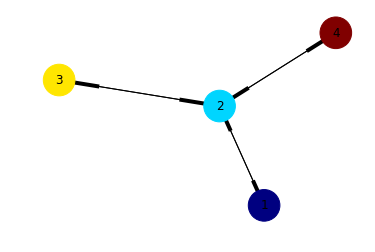

In [55]:
plt.show()

In [ ]:
#How many nodes is tgere in the graph?

In [56]:
H.number_of_nodes()

4

### pygraphviz

In [57]:
# we want a graph which is able to display self loop (not possible with pyplot)

In [58]:
import pygraphviz as pgv

In [59]:
# let's create a new empty graph

In [60]:
H=pgv.AGraph(strict=True, directed = False)

In [61]:
# let's populate the graph

In [62]:
populate_graph_nodes(M,H)

In [63]:
# let's modify the edge list from what was processed before

In [64]:
list_edges=list_edges +[(4,4)]

In [65]:
# the list of edges contains now a self loop (4,4)
# which is not diplayed if we use the pyplot

In [66]:
H.add_edges_from(list_edges)

In [67]:
list_edges

[(1, 2), (2, 1), (2, 3), (2, 4), (3, 2), (4, 2), (4, 4)]

In [68]:
# set a layout(necessary)
# save to file
# and display it

In [79]:
# helper_function
# display the graph saved as picture

In [80]:
def display_graph_from_file(filename="file.png",show_ticks=False):
    a_pic=plt.imread(os.getcwd()+"/"+filename)
    if (show_ticks)== False:
        set_off_labels('x')
        set_off_labels('y')
    plt.imshow(a_pic)
    plt.show()

In [81]:
def save_file(H,filename="file.png"):
    H.layout(prog='neato')
    H.draw(os.getcwd()+"/"+filename)
    return(display_graph_from_file())

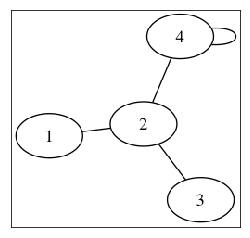

In [82]:
save_file(H)